## *`FIT5149 Assessment 2`*
## Authorship Profiling - Gender Classification
***
**Group no. 29**
## Student Names: 
- Nivetha Rajakumar (30321670) <br>
- Keerthana Muralitharan (30159474)<br>
- Monisha Mohan Kumar(30256224)<br>
***

**Date:** 14/06/2020

**Version:** 1.0

**Environment:** `Python 3.7.1` and `Anaconda 4.7.11` (64-bit)
***
## 1. Introduction

Authorship profiling is the evaluation of a given collection of texts in an effort to discover the author's specific characteristics based on content features. This helps in identifying profiling aspects such as gender, age, native language, or personality type.

The task of profiling authorship is often formulated as a classification problem, where a classifier is fed with a text and the corresponding gender or native language label returns. There are several methods of machine learning which can be used in the role of classification. They can be classified into supervised (such as SVM) method and unsupervised (such as clustering) method.

The aim of this assessment is to develop a classifier that can assign its corresponding labels to a set of twitter texts. In this assessment, we are focusing on the task of gender classification, where you are required to develop a classifier that can as accurately as possible identify the gender of the tweet author.

***
## 2. Initialising and setting up the environment
### 2.1 Importing required libraries
Importing the packages and necessary libraries to build a classifier to predict the classifiers

In [1]:
# Packages for data processing
import re
import pandas as pd
import string
import spacy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#!pip install wordcloud
from wordcloud import WordCloud

#Package for feature extraction
import nltk.data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize   
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer



#Packages for building a classifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statistics import mode
from sklearn.metrics import accuracy_score




### 2.2 Initialisation for the Data Pre-processing

For the data preprocessing the stopwords and the word-tokenizer are being initialized. The stemmer and lemmatizer is also defined. 

In [2]:
# Stops words for pre-processing
nltk.download('stopwords')
stop_word = stopwords.words('english')

#Initialising the word-tokenizer
word_tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?")

# Defining the Stemmer and Lemmatizer   
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***
## 3. Loading and Examining data

The train and test data is read from the csv files and stored in a pandas dataframe.

In [3]:
train_df=pd.read_csv("train_labels.csv") # reading labeled data
test_df=pd.read_csv("test.csv") # reading test data

In [4]:
#Display the head of the train dataset
train_df.head()

,id,gender
0,d7d392835f50664fc079f0f388e147a0,male
1,ee40b86368137b86f51806c9f105b34b,female
2,919bc742d9a22d65eab1f52b11656cab,male
3,15b97a08d65f22d97ca685686510b6ae,female
4,affa98421ef5c46ca7c8f246e0a134c1,female


In [5]:
#Display the head of the test dataset
test_df.head()

,id,gender,language
0,d6b08022cdf758ead05e1c266649c393,NaN,NaN
1,9a989cb04766d5a89a65e8912d448328,NaN,NaN
2,2a1053a059d58fbafd3e782a8f7972c0,NaN,NaN
3,6032537900368aca3d1546bd71ecabd1,NaN,NaN
4,d191280655be8108ec9928398ff5b563,NaN,NaN


In [6]:
#display the first record of the train dataset
train_df.iloc[0]

id        d7d392835f50664fc079f0f388e147a0
gender                                male
Name: 0, dtype: object

###### The snippet of the data in the xml file and the first 1000 character of the first XML file is displayed.

In [7]:
#XML file is read and displayed
with open('data/d7d392835f50664fc079f0f388e147a0.xml','r',encoding='cp437') as in_file:
    xml_first_data = in_file.read()
    
# xml_data is a string and the first 1000 chracters are printed, ready for inspection
print(xml_first_data[0:1000])

<author lang="en">
	<documents>
		<document><![CDATA[@CSIFERROSCAN youch! Good things to know! Is that sort of stuff repairable?]]></document>
		<document><![CDATA[Succumbed to FOMO and bought GNR tickets. Remember asking parents to buy GNR Lies album as a young boy because it had boobies inside. ≡ƒÿé]]></document>
		<document><![CDATA[Brown eye Broom a cool 73 then to the rescue to clear out some broken window in Wellington @TheACCnz https://t.co/eoYmdswYX5]]></document>
		<document><![CDATA[Shout out to Auckland tennis fans who get to sleep in this morning but worth it to watch the ≡ƒÉÉ win #18 #Federer #needcoffee]]></document>
		<document><![CDATA[@nickyoung210 Someone had some balls to come up with that ≡ƒÿé]]></document>
		<document><![CDATA[@okcthunder Hey guys, are there any more releases coming of the 2016 Christmas day jerseys?]]></document>
		<document><![CDATA[@JulieReddish Yeah but curiosity got the better of me!! ≡ƒæÇ]]></document>
		<document><![CDATA[@JulieReddish I rew

###### The size of the train and test datasets are being displayed below

In [8]:
#Display the size of the train and test dataset
print("Length of training dataset is:",len(train_df))
print("Length of testing dataset is:",len(test_df))

#Dimensions of the train and test dataset
print("Shape of the train dataset",train_df.shape)
print("Shape of the test dataset",test_df.shape)

Length of training dataset is: 3100
Length of testing dataset is: 500
Shape of the train dataset (3100, 2)
Shape of the test dataset (500, 3)


#### 3.2 Exploring the data

In [9]:
## Looking at the labels ratio - train set
print('No of tweets by Male (out of 3100) - ',train_df.gender[train_df.gender=='male'].count())
print('No of tweets by Female (out of 3100) - ',train_df.gender[train_df.gender=='female'].count())

No of tweets by Male (out of 3100) -  1552
No of tweets by Female (out of 3100) -  1548


***
## 4. Data Preparation & Feature Extraction
Most common pre-processing steps include, <br>
> - Tokenization 
> - Case normalization
> - Stopword removal
> - Removal of most frequent and less frequent words
> - Stemming / Lemmatization
> - Generation of n-grams

### 4.1 Reading XML files and Extracting the XML content
- Defining a function to read XML files and append the preprocessed sentences as done above

In [10]:
#Creating the empty lists 
train_vec = []
pre_processed_data=[]
#function to read the XML files which must be preprocessed
def read_xml(file_name):
    with open(file_name,'r',encoding='cp437') as in_file: #read the xml data
        xml_data = in_file.read()
        
        # Calling function to pre-process data
        pre_processed_dt = preprocess(xml_data)
        pre_processed_data.append(pre_processed_dt)
        return(pre_processed_dt)

### 4.2 Data Preprocessing

A function is written to read all the xml file content and remove the unwanted characters from the text and normalise the text content.The words starting with @ are removed,Hyperlinks are removed and only alpha numeric content is retained.

In [11]:
#Function to preprocess the data and read the XML files
def preprocess(xml_data):
    pattern_text = pattern_text = r'<document><!\[CDATA\[(.*?)\]\]></document>' #extracting the sentences
    # Text extraction
    xml_text = re.findall(pattern_text, xml_data,  flags=re.DOTALL)
    #for every text file unwanted characters are being removed
    for i in range(0,len(xml_text)):
       

        # Removal of unwanted characters
        xml_text[i] = re.sub('@[^\s]* ', '',  xml_text[i]) #removing what is starting from @
        xml_text[i] = re.sub(' https://.*', '', xml_text[i]) #removing all the https tags
        xml_text[i] = re.sub('[^A-Za-z0-9\s]*', '', xml_text[i]) #removing words and special characters which are not alphabets

        # Case Normalisation
        xml_text[i] = xml_text[i].lower()
    
    xml_text = ' '.join(xml_text)
    return(xml_text)

- Appending .xml to the training dataframe and reading the xml file and appending the preprocessed data

In [12]:
#Processing the train dataset 
train_df['id_link'] = ''
train_df['preprocessed'] = ''

for i in range(0,len(train_df)):
    train_df['id_link'][i]='data\\' +train_df['id'][i]+'.xml'
    # Calling function to read XML files
    preprocessed = read_xml(train_df['id_link'][i])
    train_df['preprocessed'][i]=preprocessed

- Appending .xml to the testing dataframe and reading the xml file and appending the preprocessed data

In [13]:
#Processing the test dataset
test_df['id_link'] = ''
test_df['preprocessed'] = ''

for i in range(0,len(test_df)):
    test_df['id_link'][i]='data\\' +test_df['id'][i]+'.xml'
    # Calling function to read XML files
    preprocessed = read_xml(test_df['id_link'][i])
    test_df['preprocessed'][i]=preprocessed

C:\Users\Keerthana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Keerthana\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


- Adding the XML link and preprocessed text of the XML files to the train and test dataframes

In [14]:
#Display the new train dataframe
train_df.head()

,id,gender,id_link,preprocessed
0,d7d392835f50664fc079f0f388e147a0,male,data\d7d392835f50664fc079f0f388e147a0.xml,youch good things to know is that sort of stuf...
1,ee40b86368137b86f51806c9f105b34b,female,data\ee40b86368137b86f51806c9f105b34b.xml,donald the menace thankscomey a return to nat...
2,919bc742d9a22d65eab1f52b11656cab,male,data\919bc742d9a22d65eab1f52b11656cab.xml,this seems super sketch too good to be true\n...
3,15b97a08d65f22d97ca685686510b6ae,female,data\15b97a08d65f22d97ca685686510b6ae.xml,just some texts with my dad about our saturday...
4,affa98421ef5c46ca7c8f246e0a134c1,female,data\affa98421ef5c46ca7c8f246e0a134c1.xml,irrevocably love this talented human and so pr...


In [15]:
#Display the new test dataframe
test_df.head()

,id,gender,language,id_link,preprocessed
0,d6b08022cdf758ead05e1c266649c393,NaN,NaN,data\d6b08022cdf758ead05e1c266649c393.xml,what odds he stops whining and goes out and ge...
1,9a989cb04766d5a89a65e8912d448328,NaN,NaN,data\9a989cb04766d5a89a65e8912d448328.xml,bingay i won a cool handy tonight cashmoney ho...
2,2a1053a059d58fbafd3e782a8f7972c0,NaN,NaN,data\2a1053a059d58fbafd3e782a8f7972c0.xml,the cynical manipulation of voters desire for ...
3,6032537900368aca3d1546bd71ecabd1,NaN,NaN,data\6032537900368aca3d1546bd71ecabd1.xml,cannot convert b to object on sony braavia be...
4,d191280655be8108ec9928398ff5b563,NaN,NaN,data\d191280655be8108ec9928398ff5b563.xml,cat is a kneading maniac floppycats the left g...


### 4.3 Preparing Data for feature extraction

The preprocessed data and labels from the train dataset is being converted to the list and the preprocessed data from the test data XML files are converted to the list to get the features extracted.The preprocessed content of the first file is displayed.

In [16]:
# Converting to preprocessed content and labels for each file to list
train_text = train_df.preprocessed.tolist() 
train_label = train_df.gender.tolist() 

#Converting the preprocessed content for each file to list
test_text = test_df.preprocessed.tolist() 

### 4.4 Feature Extraction using TF-IDF vectorizer
To Extract the features we remove the blank lines, stopwords and punctuations from the preprocessed text content

In [17]:
# Creating a list for removal of stopwords and punctuations
stopwords_fin = stop_word+list(string.punctuation)

- Words are tokenized and stored as list of lists where every sublist is a document while the outer list represents the whole corpus
- The LemmaTokenizer is used for this operation<br><br>

- Stemming is performed to make sure similar words are generalised into a single stemmed word and only the words are kept and numbers are removed using RegexTokeniser
- This way, the contextual meaning of the word retains even though the word originally exists in different verbal context
- The vocab will then have a single occurance of that word making sure the Sparse vector doesn't have different ways of occurance for the same word

In [18]:
# Defining the tokenizer
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    def __call__(self,doc):
        #using regex tokenizer,extracting the words with whitespaces alone
        output = ''.join(re.findall('[a-zA-Z\s]+',doc))
        return [self.wnl.lemmatize(t) for t in word_tokenize(output)]

- TF-IDF (Term Frequency-Inverse Document Frequency): It is a measure of how important a word/n-gram is to a document in a collection. 
- The minimum document frequency is 5% of the documents
- The maximum document frequency is 95% of the documents
- In general,Tokens with less than 5% and more than 95% of document frequency is removed , which in this model buildiing also resulted in good accuracy 
- The ngram considered are unigram,bigram and trigram to get better results, when we have more features to analyse , we tend to get best results.

In [19]:
# TF-IDF vectorization
vectorizer=TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=0.05,
                           max_df=0.95,
                           ngram_range=(1,3),
                           tokenizer=LemmaTokenizer(),
                           stop_words=stopwords_fin)

### 4.5 Fitting the TF-IDF vectorizer to transform the data

The vectorizer is used to transform the train and test data. The output label field is converted into an array of list.There are 1862 feature names generated. 

In [20]:
# Fitting the data and converting to arrays
x_train=vectorizer.fit_transform(train_text)
y_train=np.asarray(train_label)


# Use the same vectorizer to transform the test set
x_test=vectorizer.transform(test_text)

C:\Users\Keerthana\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'ha', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wa', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [21]:
x_train

<3100x1862 sparse matrix of type '<class 'numpy.float64'>'
	with 881102 stored elements in Compressed Sparse Row format>

In [22]:
len(vectorizer.get_feature_names())

1862

### 4.6 Visualizing the Features

A wordcloud is generated for the for the highest frequency values of the feature names generated by the vectorizer.

In [23]:
#https://stackoverflow.com/questions/61916096/word-cloud-built-out-of-tf-idf-vectorizer-function
feature_names = vectorizer.get_feature_names()
dense = x_train.todense()
lst1 = dense.tolist()
#storing the details in a dataframe
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)


able          22.108251
absolute      16.680364
absolutely    28.350321
accept        11.350078
access        14.887067
                ...    
youve         28.086061
yr            23.721974
yup           11.897810
zealand       23.815221
zero           9.346532
Length: 1862, dtype: float64

In [24]:
#WordCloud is being plotted based on the words frequencies
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df.T.sum(axis=1))

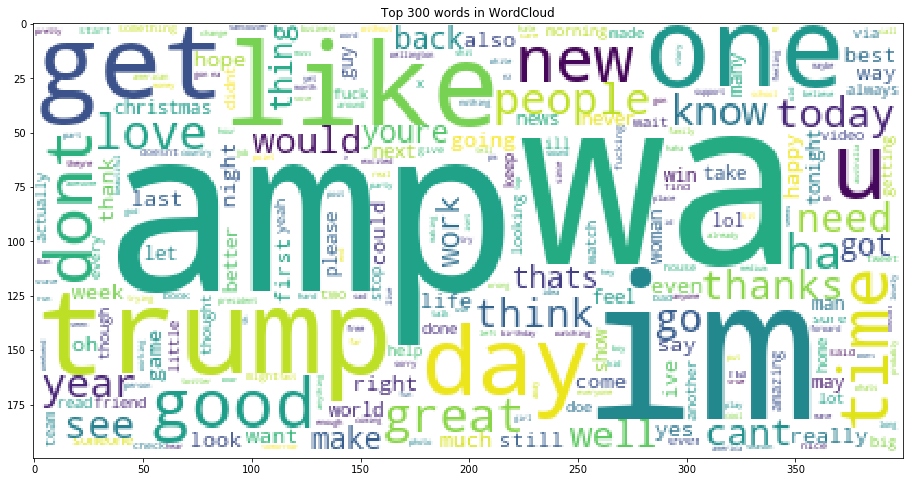

In [34]:
#Plotting the Word Cloud
plt.figure(figsize=(18,8))
plt.imshow(Cloud)
plt.title("Top 300 words in WordCloud")
plt.show()

***
## 5. Classifier Model Building

Using the traditional machine learning algorithms like Logistic Regression,Linear SVC,Random Forest Classifier we have developed classifiers that gives the most accurate prediction for the given dataset based on its predictions.These 3 classifiers are built and they are ensembled by taking the mode of the prediction values is taken into a list. 

In [26]:
#Building a classfier for logistic Regression
lr = LogisticRegression()
model_name = lr.__class__.__name__
#fit the model to the data
lr.fit(x_train, y_train)
print(model_name)
# Do the prediction
lr_predict=lr.predict(x_test)

LogisticRegression


In [27]:
#Building a classifier for Linear SVC
svc = SVC(C=0.8,gamma=1,degree=3,kernel='linear')
model_name = svc.__class__.__name__
#Fit the model to the data
svc.fit(x_train, y_train)
print(model_name)
# Do the predictions
svc_predict=svc.predict(x_test)


SVC


In [28]:
#Building the classifier for Random Forest
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=100, verbose=0, warm_start=False,class_weight=None)
model_name = rf.__class__.__name__
#Fit the model for the data
rf.fit(x_train, y_train)
print(model_name)
# Do the predictions
rf_predict=rf.predict(x_test)


RandomForestClassifier


In [29]:
#https://www.geeksforgeeks.org/python-statistics-mode-function/#:~:text=Python%20statistics%20%7C%20mode%20function,most%20likely%20to%20be%20sampled.&text=Syntax%20%3A%20mode(%5Bdata%2Dset,numbers%20as%20well%20as%20Strings.
#Finding the mode (most number of occcuring ) of the predictions into a list
best_predictions = [mode(prediction) for prediction in zip(lr_predict,svc_predict,rf_predict)]

***
### 6. Model Evaluation

The test data predictions is read and the predictions from the the ensemble model and the accuracy score is generated.

In [30]:
#Read the test data
test_df=pd.read_csv("test_labels.csv")
#Store the gender labels in the predictions list
predictions=test_df.gender.to_list()

In [31]:
print("Accuracy_score of ensemble model:",accuracy_score(predictions,best_predictions))

Accuracy_score of ensemble model: 0.816


***
## 7. Output Generation

The gender labels which are predicted are stored in a dataframe and then exported to a csv file

In [32]:
#Output dataframe with the gender labels and document ids
output=pd.DataFrame(list(zip(test_df['id'].tolist(),best_predictions)),columns=['id','gender'])
#male and female are converted to 1 & 0
output['gender'] = output['gender'].map({'male': 1, 'female': 0})
output.head()


,id,gender
0,d6b08022cdf758ead05e1c266649c393,1
1,9a989cb04766d5a89a65e8912d448328,0
2,2a1053a059d58fbafd3e782a8f7972c0,1
3,6032537900368aca3d1546bd71ecabd1,1
4,d191280655be8108ec9928398ff5b563,1


In [33]:
#Output is tored into a CSV file
output.to_csv("pred_labels.csv", index = False)

***
## 8. References

- https://www.sciencedirect.com/science/article/pii/S1877050916326849
- https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
- https://realpython.com/python-keras-text-classification/
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
- https://scikit-learn.org/stable/supervised_learning.html
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
- https://hampao.wordpress.com/2016/04/08/building-a-wordcloud-using-a-td-idf-vectorizer-on-twitter-data/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
- martinschweinberger.de/docs/articles/PosTagR.pdf
- https://www.tidytextmining.com/tfidf.html
- https://scikit-learn.org/stable/modules/feature_extraction.html
- https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
- http://www.katrinerk.com/courses/words-in-a-haystack-an-introductory-statistics-course/schedule-words-in-a-haystack/r-code-the-text-mining-package
- https://www.tidytextmining.com/index.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- https://www.advancedinstaller.com/user-guide/xml-escaped-chars.html
- https://machinelearningmastery.com/make-predictions-scikit-learn/